## **Fundamentals of Data Analysis Tasks**

**Olga Knutova**
***
This  notebook contains my solutions to the tasks for Fundamentals of Data Analysis module of Higher Diploma in Science in Data Analytics 23-24 Atlantic Technological University

#### Task 1. 
***
*To verify, using Python, that the Collatz conjecture is true for
the first 10,000 positive integers.*
***

> The Collatz conjecture is a famous unsolved problem in mathematics. 
The problem is to prove that if you start with any positive
integer x and repeatedly apply the function f(x) below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .

>f(x) = x ÷ 2  if x is even  3x + 1  otherwise




In [399]:
def f(z):
    #If z is even, devide it by two.
    if z%2==0:
        return z//2
    # If z is odd multiply by 3 and add 1
    else:
        return (z*3)+1

In [400]:

def collatz(y):
    s=0
    while y!=1:
        y=f(y)
        s+=1
        if s==500:
            return(0)
    return(y)


https://en.wikipedia.org/wiki/Collatz_conjecture
The starting value having the largest total stopping time while being

less than 10 is 9, which has 19 steps,
less than 100 is 97, which has 118 steps,
less than 1000 is 871, which has 178 steps,
less than 104 is 6171, which has 261 steps,

In [401]:
n=0
for x in range (1, 10001):
    if collatz(x) == 1:
        n+=1
    else:
        print(f"Collatz conjecture is not true for {x}")
if n==10000:
    print("Collatz conjecture is valid for the first 10000 positive integers")  

Collatz conjecture is valid for the first 10000 positive integers


#### Task 2. 
***
*Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables that should be used to model them in Python, explaining your rationale*
***

In [402]:
import pandas as pd

In [403]:
penguins_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [404]:

print(penguins_df.head())
print("------")
print("shape:", penguins_df.shape)
print("------")
print(penguins_df["species"].value_counts())
print("------")
print(penguins_df["island"].value_counts())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
------
shape: (344, 7)
------
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
------
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64


##### Types of variables in Penguins data set

As we can see in shape output this data set contains 7 variables that can be groupped in two main types : 
**Categorical** (species, island, sex) and **Quantitative** (bill_length_mm,bill_depth_mm, flipper_length_mm, body_mass_g).

All Quantitative variables in this dataset are Continuous. 
Out of three Categorical variables one is Binary (sex) and other two are Nominal.

##### To model in Python 

For all Quantitative variables to model in Python we can use a floating point numbers.
If we have a better look at body_mass_g and flipper_lenghh_mm variables, they dont containe any numbers after decimal point, so they can be modeled in integers.
All mesurments are positive real numbers.
***
Categorical variables modeled as a string. It is possible to model sex variable as an integer for example Male=1 and Female=2

#### Task 3. 
***
*For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.*
***
For mesurments Quantitative variables (bill_length_mm,bill_depth_mm, flipper_length_mm, body_mass_g) Normal Distribution is most appropriate it doesnt look right if you plot variable of all data set as one. But if you plot mesurments of each spieses separatly you will see bell shape tipical for normal distribution.

For variable "sex" Binominal Distribution is more appropriat
For "species", "island" -Multinominal Distribution as possible outcome is more than two.


In [405]:
import numpy as np


#### Task 4. 
***
*Suppose you are flipping two coins, each with a probability p of
giving heads. Plot the entropy of the total number of heads versus p*
***

In [406]:
from numpy import random

x = random.binomial(n=2, p=0.5, size=10)

print(x)

[1 1 1 1 2 2 1 2 1 1]


https://en.wikipedia.org/wiki/Entropy_(information_theory)

"Two bits of entropy: In the case of two fair coin tosses, the information entropy in bits is the base-2 logarithm of the number of possible outcomes; with two coins there are four possible outcomes, and two bits of entropy. Generally, information entropy is the average amount of information conveyed by an event, when considering all possible outcomes."
For one event (one coin flip) formula for event entropy is
I(E)=-log2(p(E)) 
For two events probabylity of one event raised to the power of 2.
the formula for the entropy of the total number of heads
I(E)=-log2(p(E)2)

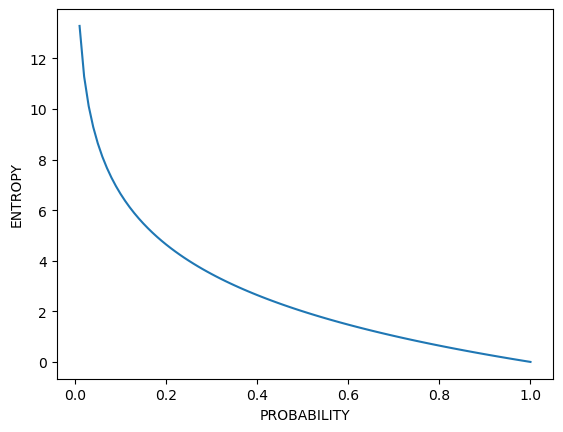

In [407]:
import matplotlib.pyplot as plt
import numpy as np
#function y=-log2(x^2)

def f(x):
#    return x**2
    return -(np.log2(x**2))

x = np.linspace (0.01, 1, 100)
y = f(x)
plt.plot(x,y)
plt.xlabel("PROBABILITY")
plt.ylabel("ENTROPY")
plt.show()

#### Task 5. 
***
*Create an appropriate individual plot for each of the variables in
the penguin data set.*
***

In [408]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

penguins_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

**Species**- this categorical variable can be plotetd as bar chart or Pie chart to visualise proportion of easch species in accomulated data.

In [409]:
print(penguins_df["species"].value_counts())

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


Text(0.5, 1.0, 'Value Count Bar Chart- Species')

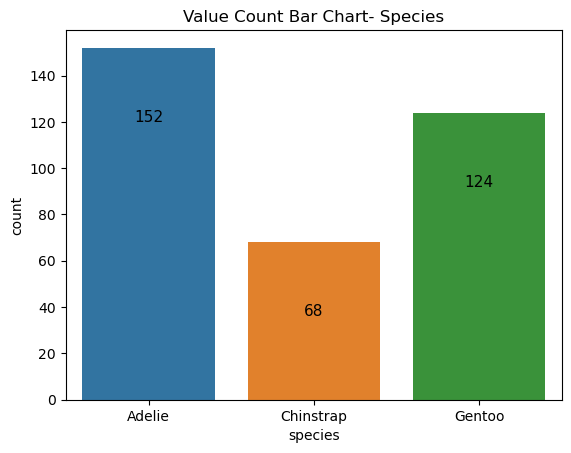

In [462]:
ax=sns.countplot(x='species', data=penguins_df)

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, -50),
                textcoords='offset points')
ax.set_title("Value Count Bar Chart- Species")


Text(0.5, 1.0, 'Value Count Pie Chart-Species%')

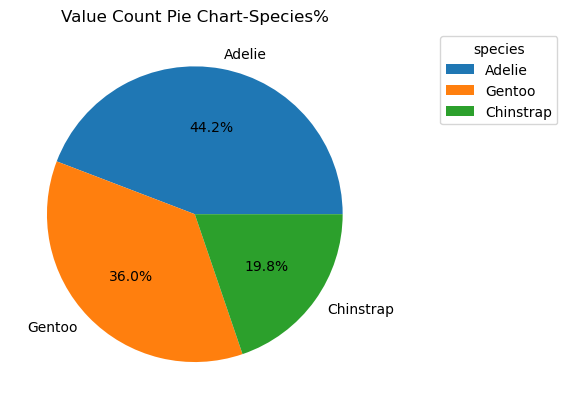

In [463]:
ax=penguins_df['species'].value_counts().plot(kind='pie', autopct='%1.1f%%')

ax.legend( title="species", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))
ax.yaxis.set_visible(False)
ax.set_title("Value Count Pie Chart-Species%")



**Island**- is similar to spesies - categorical variable can be ploted as Bar chart or Pie chart to visualise where data was accumulated.


In [412]:

print(penguins_df["island"].value_counts())

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64


Text(0.5, 1.0, 'Value Count Bar Chart-Island')

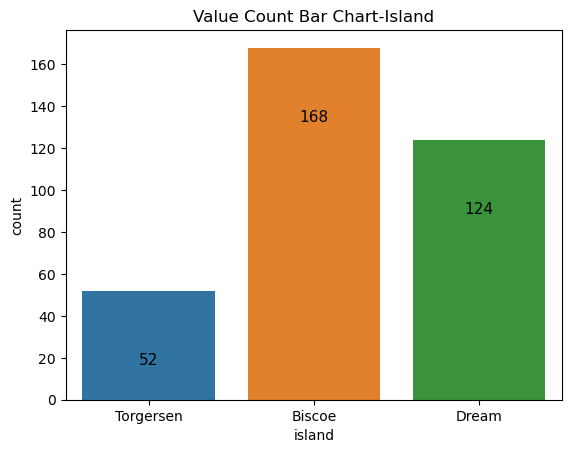

In [464]:
ax=sns.countplot(x='island', data=penguins_df)

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, -50),
                textcoords='offset points')
ax.set_title("Value Count Bar Chart-Island")

Text(0.5, 1.0, 'Value Count Pie Chart-Island%')

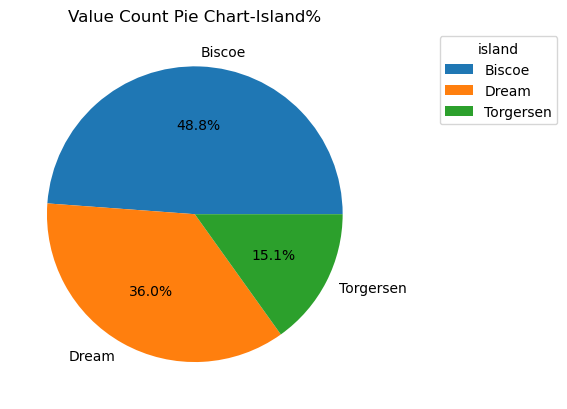

In [465]:
ax=penguins_df['island'].value_counts().plot(kind='pie',autopct='%1.1f%%')

ax.legend( title="island", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))
ax.yaxis.set_visible(False)
ax.set_title("Value Count Pie Chart-Island%")

**Sex**- Categorical binary variable

In [415]:

print(penguins_df["sex"].value_counts())

MALE      168
FEMALE    165
Name: sex, dtype: int64


Text(0.5, 1.0, 'Value Count Bar Chart- Sex')

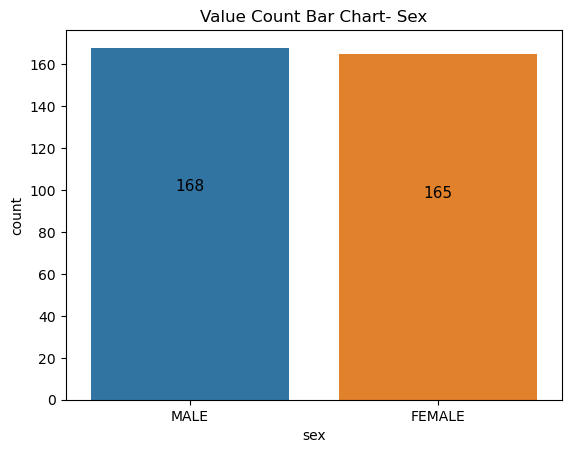

In [461]:
ax=sns.countplot(x='sex', data=penguins_df)

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, -100),
                textcoords='offset points')
ax.set_title("Value Count Bar Chart- Sex")


Text(0.5, 1.0, 'Value Count Pie Chart-Sex%')

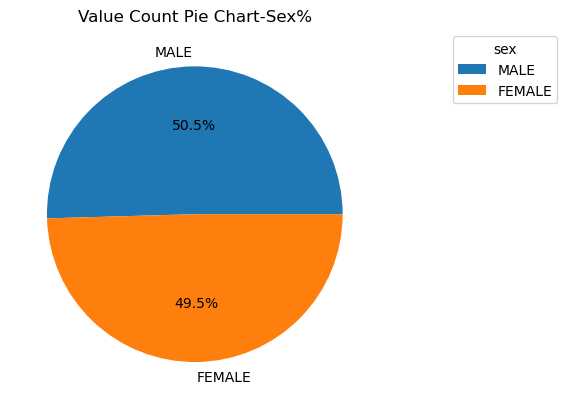

In [460]:
ax=penguins_df['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

ax.legend( title="sex", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))
ax.yaxis.set_visible(False)

ax.set_title("Value Count Pie Chart-Sex%")


**Bill length** - Quantitative variables can be ploted as histogram 

Text(0.5, 1.0, 'Histogram of Bill Lenght')

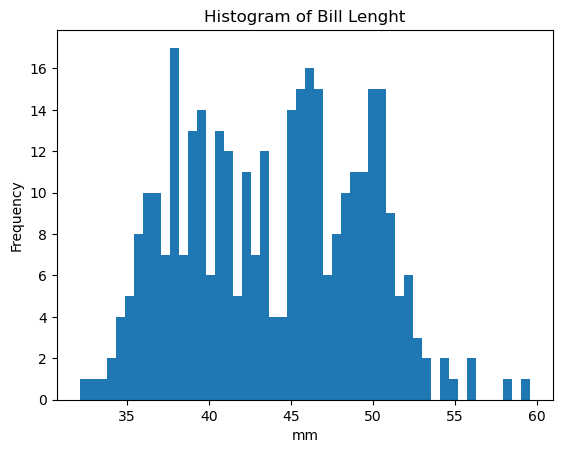

In [479]:
ax=penguins_df['bill_length_mm'].plot.hist(bins=50)
plt.xlabel("mm")
ax.set_title('Histogram of Bill Lenght')

As we can see plotting all values of variable as one histogramm doesn't give as muhch information. We know that we can group data by spesies. Let's check if ploting individual histogram for each species will give as better picture.

Text(0.5, 1.0, 'Histogram of Bill Length per species')

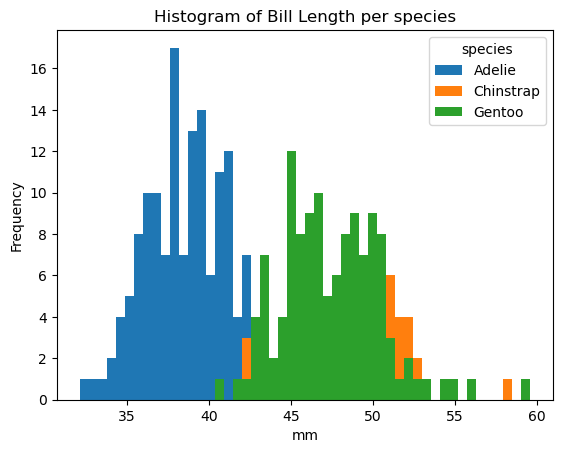

In [478]:

data_bill_l = penguins_df.pivot(columns = 'species', 
                     values = 'bill_length_mm') 
  
ax=data_bill_l.plot.hist(bins=50)
plt.xlabel("mm")
ax.set_title('Histogram of Bill Length per species')

We can see that two species are overlaping in this mesurment

Text(0.5, 0, 'mm')

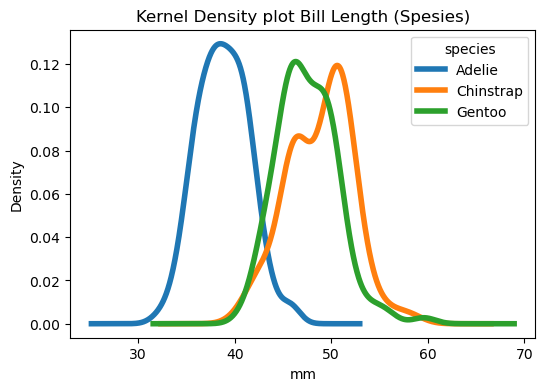

In [477]:

data_bill_l = penguins_df.pivot(columns = 'species', 
                     values = 'bill_length_mm') 
  
ax=data_bill_l.plot.kde(figsize = (6, 4), 
                   linewidth = 4)
ax.set_title("Kernel Density plot Bill Length (Spesies)")
plt.xlabel("mm")

Text(0.5, 1.0, 'Kernel Density plot Bill Length in mm (Sex)')

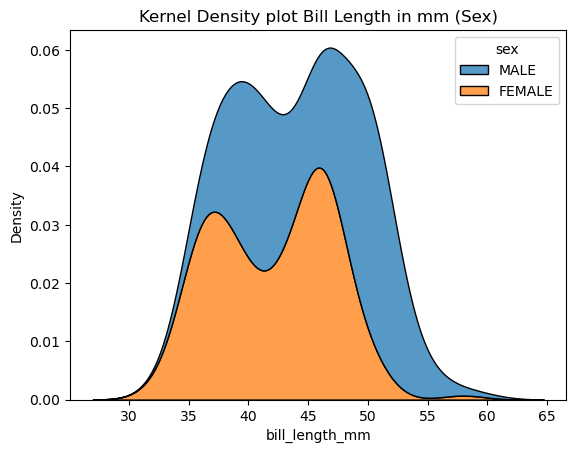

In [471]:
ax= sns.kdeplot(data=penguins_df, x="bill_length_mm", hue="sex", multiple="stack")
ax.set_title('Kernel Density plot Bill Length in mm (Sex)')

Text(0.5, 1.0, 'Kernel Density plot Bill Length in mm (Sex and Species)')

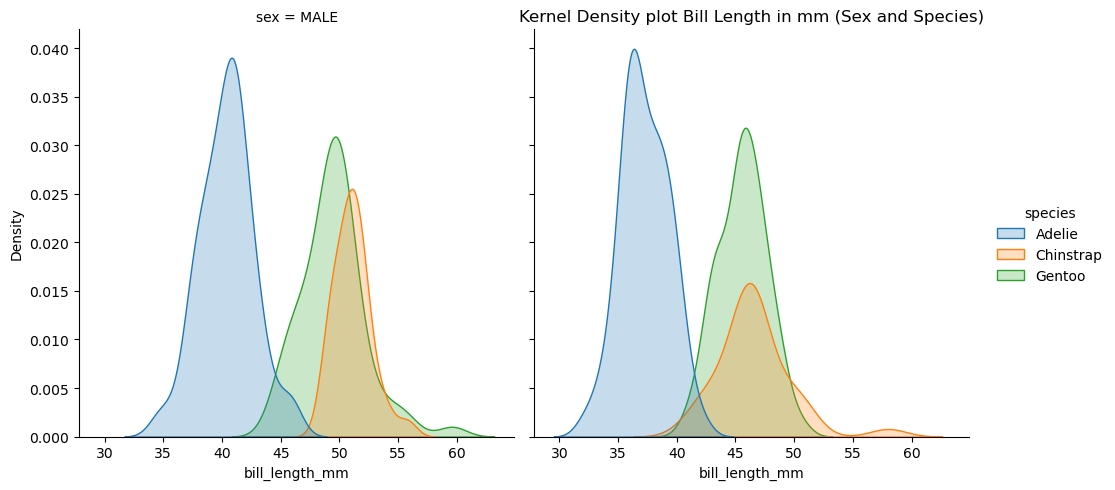

In [475]:


ax=sns.displot(penguins_df, x="bill_length_mm", hue="species", col="sex", kind="kde", fill=True)

plt.title('Kernel Density plot Bill Length in mm (Sex and Species)')

**Bill depth**

Text(0.5, 0, 'mm')

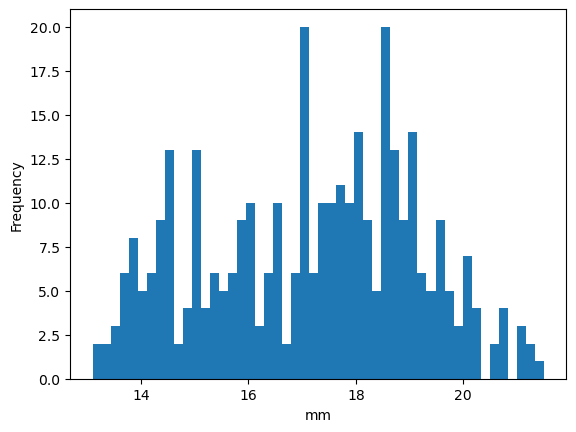

In [480]:
penguins_df['bill_depth_mm'].plot.hist(bins=50)
plt.xlabel("mm")

Text(0.5, 0, 'mm')

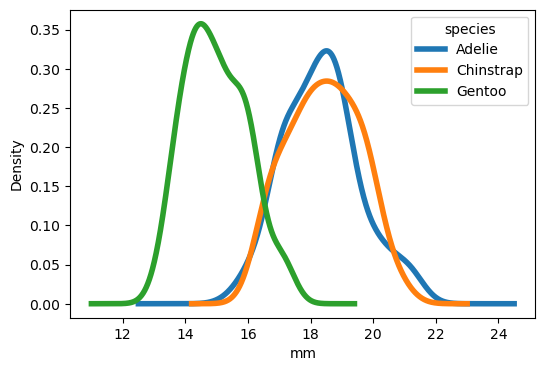

In [481]:
data_bill_d = penguins_df.pivot(columns = 'species', 
                     values = 'bill_depth_mm') 
  
data_bill_d.plot.kde(figsize = (6, 4), 
                   linewidth = 4)
plt.xlabel("mm")

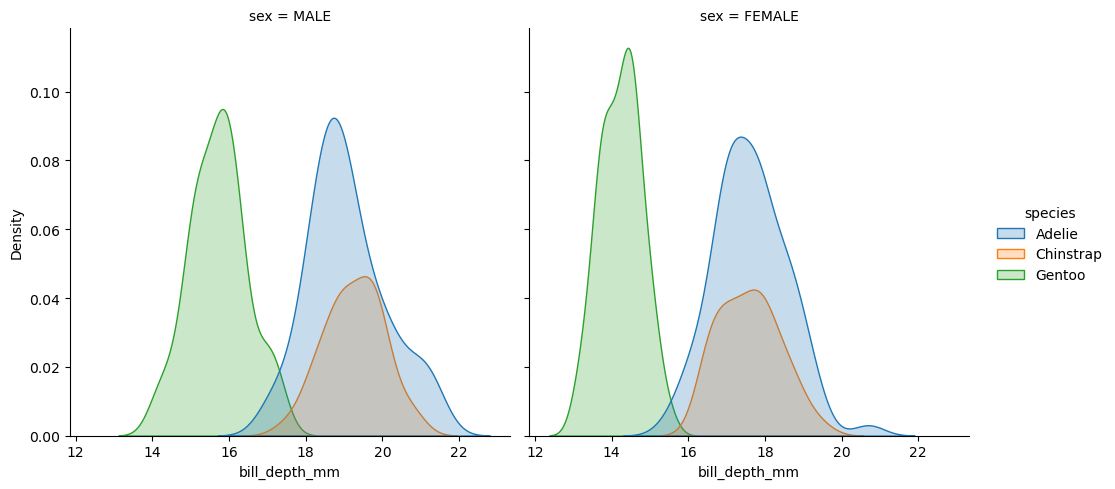

In [439]:
sns.displot(penguins_df, x="bill_depth_mm", hue="species", col="sex", kind="kde", fill=True)

plt.show()

**Flipper length**

Text(0.5, 0, 'mm')

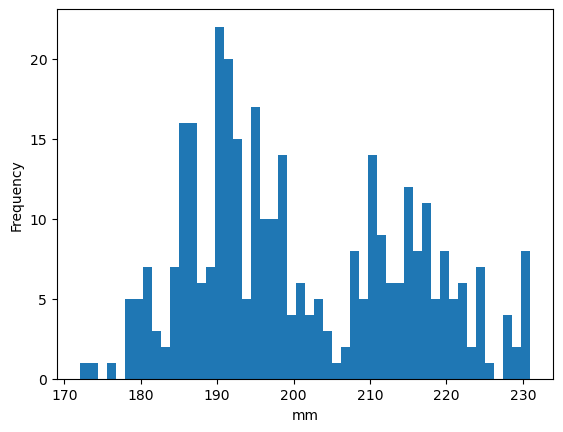

In [482]:
penguins_df['flipper_length_mm'].plot.hist(bins=50)
plt.xlabel("mm")

Text(0.5, 0, 'mm')

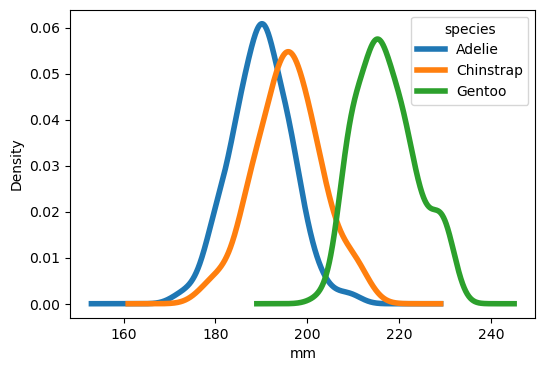

In [483]:
data_flipper_l = penguins_df.pivot(columns = 'species', 
                     values = 'flipper_length_mm') 
  
data_flipper_l.plot.kde(figsize = (6, 4), 
                   linewidth = 4)
plt.xlabel("mm")

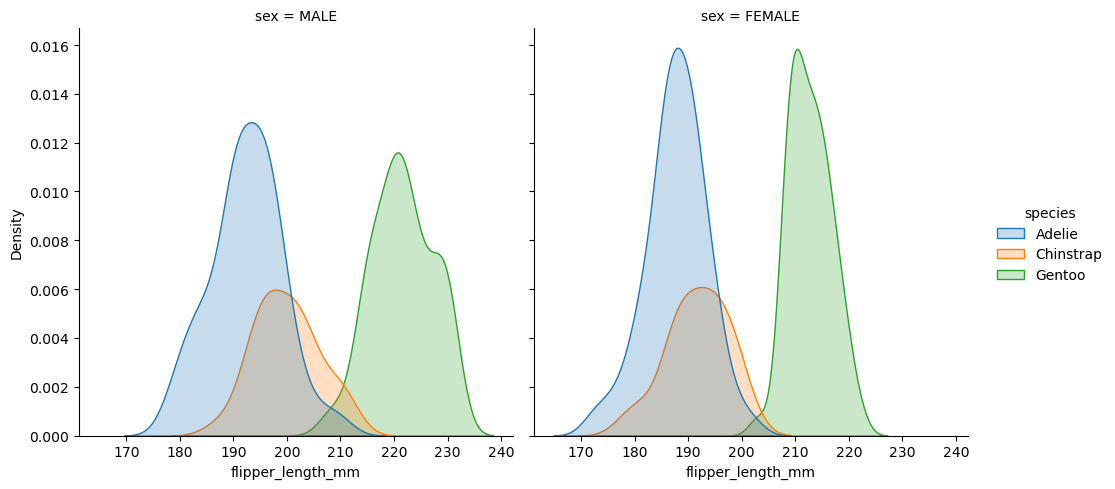

In [441]:
sns.displot(penguins_df, x="flipper_length_mm", hue="species", col="sex", kind="kde", fill=True)

plt.show()

**Body mass**

Text(0.5, 0, 'grams')

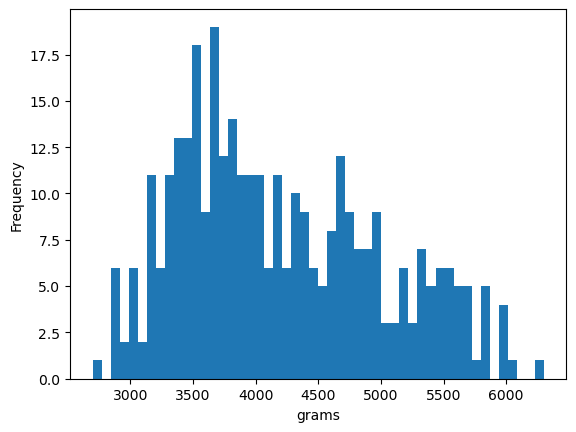

In [484]:
penguins_df['body_mass_g'].plot.hist(bins=50)
plt.xlabel("grams")

Text(0.5, 0, 'grams')

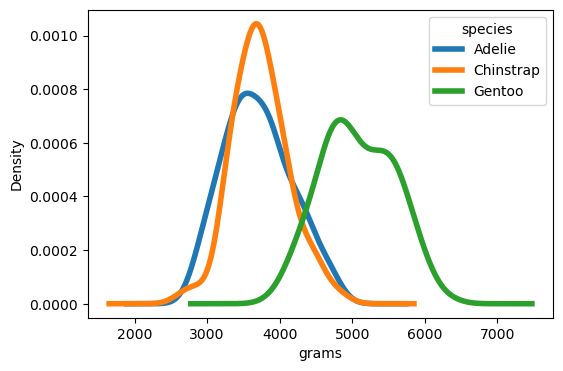

In [485]:
data_bm = penguins_df.pivot(columns = 'species', 
                     values = 'body_mass_g') 
  
data_bm.plot.kde(figsize = (6, 4), 
                   linewidth = 4)
plt.xlabel("grams")

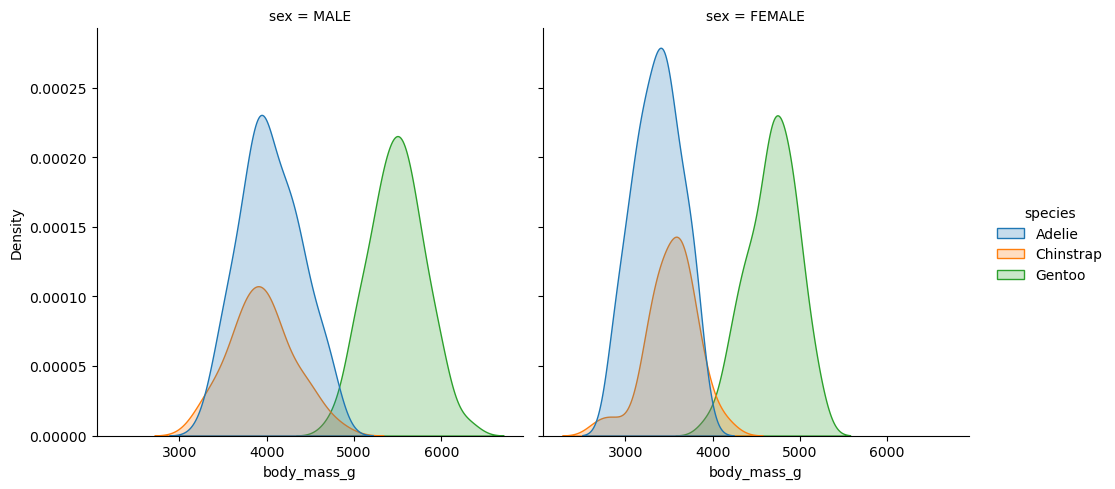

In [486]:
sns.displot(penguins_df, x="body_mass_g", hue="species", col="sex", kind="kde", fill=True)


***
## End